In [145]:
import numpy as np
import matplotlib.pyplot as plt

In [188]:
def mean_square_error(y, y_exp):
    residus = (y - y_exp)
    return np.sum(residus**2) / len(y)

def generate_experimental_noisy_points(X, nb_points):
    x = np.linspace(0, 1, nb_points)
    target = X[0] * x ** X[1]
    noise = 0.15 * np.random.random(nb_points) * target
    return target + noise

In [207]:
class curve_fitting():
    def __init__(self):
        self.X = 0.5 * np.ones(2) # parameters
        self.nb_points = 30 # number of points for the curve
        
    def scale_parameters(self, X_raw):
        # return scaled parameters between [0, 1] for gradient convergence optimization
        X0 = ( X_raw[0] - 0 ) / ( 2000 - 0 )
        X1 = ( X_raw[1] - 0.01 ) / ( 0.5 - 0.01 )
        return np.array([X0, X1])
    
    def unscale_parameters(self):
        # return unscaled parameters between [min, max] for computing function
        X0 = self.X[0] * ( 2000 - 0 ) + 0
        X1 = self.X[1] * ( 0.5 - 0.01 ) + 0.01
        return np.array([X0, X1])
    
    def print_parameters(self):
        X_raw = self.unscale_parameters()
        print(f'Raw parameters {X_raw}')
        print(f'Scaled parameters {self.X}')
    
    def set_parameters_norm(self, X):
        self.X = X
    
    def set_parameters_raw(self, X_raw):
        X = self.scale_parameters(X_raw)
        self.X = X
        
    def function(self):
        # return your own function with X[i]
        X = self.unscale_parameters()
        x = np.linspace(0, 1, self.nb_points)
        return X[0] * x ** X[1]
    
    def optim(self, lamdba = 0.01, mu = 0.95, steps=10, delta = 0.001, y_exp=None, debug=False):
        # levenberg_marquardt
        x = np.linspace(0, 1, self.nb_points)
        print(f'X init: {self.X}')
        y = self.function()
        error = mean_square_error(y, y_exp)
        errors = [error]

        for step in range(steps):
            y = self.function()
            error = mean_square_error(y, y_exp)
            print(f'Iteration {step}: error = {np.round(error)}')
            errors.append(error)
            
            # jacobian
            J = np.zeros((len(y), len(self.X)))
            for i in range(len(self.X)):
                X2 = self.X.copy()  
                X2[i] = X2[i] + delta
                self.set_parameters_norm(X2)
                #print(f'X2: {X2}')
                Y2 = self.function()
                #print(f'Y2: {Y2}')
                X3 = self.X.copy()  
                X3[i] = X3[i] - delta
                self.set_parameters_norm(X3)
                #print(f'X3: {X3}')
                Y3 = self.function()
                J[:, i] = (Y2 - Y3) / (2*delta)
            
            JJ = np.dot(np.transpose(J), J)
            G = np.dot(np.linalg.inv( JJ + mu * np.diag(np.diag(JJ)))  , np.transpose(J))
            X = self.X + np.dot(G, (y_exp-y))
            self.set_parameters_norm(X)
            
            if debug:
                print(f'jacobian: {J}')
                print(f'gradient: {np.dot(np.transpose(J), y-y_exp)}')
                print(f'G: {G}')
                print(f'np.dot(G, (y_exp-y): {np.dot(G, (y_exp-y))}')
                print(f'next iteration: {X}')
            
        fig, ax = plt.subplots(1, 2)
        plt.title('Levenberg Marquardt Curve Fitting')
        ax[0].plot(x, y, linestyle='dashed', color='red')
        ax[0].scatter(x, y_exp, color='grey', alpha=0.9)
        ax[0].title.set_text('Fitted experimental points')
        ax[0].set_xlabel('x')
        ax[0].set_ylabel('y')
        
        ax[1].plot(errors, color='black')
        ax[1].title.set_text('Convergence')
        ax[1].set_xlabel('iterations')
        ax[1].set_ylabel('mean square error')
        
        fig.tight_layout()
        plt.show()

Raw parameters [1.00e+03 2.55e-01]
Scaled parameters [0.5 0.5]
X init: [0.5 0.5]
Iteration 0: error = 219379.0
Iteration 1: error = 95258.0
Iteration 2: error = 15542.0
Iteration 3: error = 5507.0
Iteration 4: error = 3040.0
Iteration 5: error = 2327.0
Iteration 6: error = 2129.0
Iteration 7: error = 2074.0
Iteration 8: error = 2059.0
Iteration 9: error = 2055.0


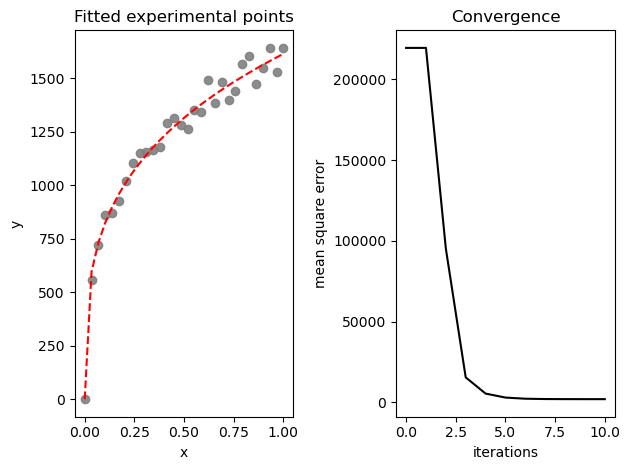

Raw parameters [1.61565638e+03 2.96622737e-01]
Scaled parameters [0.80782819 0.58494436]


In [208]:
model = curve_fitting()

model.print_parameters()
y_exp = generate_experimental_noisy_points(X=[1500,0.3], nb_points=30)

model.optim(lamdba = 0.01, mu = 0.95, steps=10, delta = 0.001, y_exp=y_exp, debug=False)
model.print_parameters()